In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.externals import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

In [3]:
CI = pd.read_csv("CI.csv")

In [4]:
import datetime
t =datetime.datetime(2000, 1, 1, 0, 0)
(t-datetime.datetime(1970,1,1)).total_seconds()

946684800.0

In [5]:
CI['START.DATE'] = CI['START.DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

In [6]:
CI['NEW_SECONDS'] = CI['START.DATE'].apply(lambda x: (x-datetime.datetime(2010,1,1)).total_seconds())

In [7]:
CI['END.DATE'] = CI['END.DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

In [11]:
CI['Endsec'] = CI['END.DATE'].apply(lambda x: (x-datetime.datetime(2010,1,1)).total_seconds())

In [12]:
CI['Diff'] = CI['Endsec'] - CI['NEW_SECONDS']

In [14]:
CI1 = CI.loc[CI['Diff']==0]

In [15]:
CI2 = CI.loc[CI['Diff']!=0]

In [16]:
CI2.describe()

,Contacts,NEW_SECONDS,Endsec,Diff
count,536.000000,5.360000e+02,5.360000e+02,5.360000e+02
mean,1.136194,1.111692e+08,1.112556e+08,8.640000e+04
std,0.379517,6.262729e+07,6.262729e+07,3.232942e-10
min,1.000000,8.640000e+04,1.728000e+05,8.640000e+04
25%,1.000000,5.894640e+07,5.903280e+07,8.640000e+04
50%,1.000000,1.093392e+08,1.094256e+08,8.640000e+04
75%,1.000000,1.625184e+08,1.626048e+08,8.640000e+04
max,4.000000,2.205792e+08,2.206656e+08,8.640000e+04


In [17]:
CI2.head()

,START.DATE,END.DATE,CONTACT.TYPE,Contacts,NEW_SECONDS,Endsec,Diff
2,2010-01-02,2010-01-03,Call - Input,1,86400.0,172800.0,86400.0
4,2010-01-03,2010-01-04,Call - Input,1,172800.0,259200.0,86400.0
9,2010-01-07,2010-01-08,Call - Input,1,518400.0,604800.0,86400.0
14,2010-01-11,2010-01-12,Call - Input,2,864000.0,950400.0,86400.0
21,2010-01-17,2010-01-18,Call - Input,1,1382400.0,1468800.0,86400.0


In [23]:
CI1.head()

,START.DATE,END.DATE,CONTACT.TYPE,Contacts,NEW_SECONDS,Endsec,Diff
0,2010-01-01,2010-01-01,Call - Input,84,0.0,0.0,0.0
1,2010-01-02,2010-01-02,Call - Input,236,86400.0,86400.0,0.0
3,2010-01-03,2010-01-03,Call - Input,182,172800.0,172800.0,0.0
5,2010-01-04,2010-01-04,Call - Input,3716,259200.0,259200.0,0.0
6,2010-01-05,2010-01-05,Call - Input,2864,345600.0,345600.0,0.0


In [18]:
sum_fin = CI1.groupby(['NEW_SECONDS'],as_index=False).sum()

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


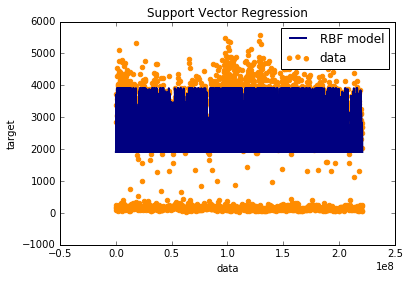

In [19]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
X =  sum_fin['NEW_SECONDS'].values
#print X
y = sum_fin['Contacts'].values

#print y
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
#y_lin = svr_lin.fit(X, y).predict(X)
#y_poly = svr_poly.fit(X, y).predict(X)
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
print mean_squared_error(y, y_rbf)

1007069.61183


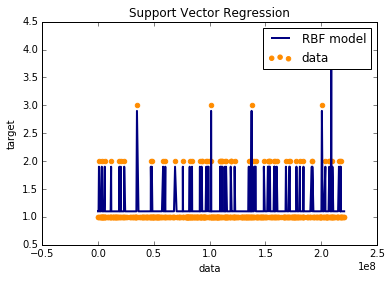

In [21]:
sum_fin2 = CI2.groupby(['NEW_SECONDS'],as_index=False).sum()
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
X =  sum_fin2['NEW_SECONDS'].values
#print X
y = sum_fin2['Contacts'].values

#print y
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
#y_lin = svr_lin.fit(X, y).predict(X)
#y_poly = svr_poly.fit(X, y).predict(X)
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
print mean_squared_error(y, y_rbf)

0.0100129610989
